<a href="https://colab.research.google.com/github/SolracArt23/Analisis-feminicdios-colombia/blob/main/feminicidios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis de feminicidios colombia 2015-2020

**Objetivo principal:**
****
Analizaremos los tipos de violencia presentes en los distintos municipios, teniendo como conocimiento la edad de la victima, tipo de daño y leyes aplicadas, con el fin de graficar relacion departamento tipo de agresiones femeninas.

In [1]:
#Importaciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras as kr
import seaborn as sns

**Datos**
****
Datos recolectados de [datos feminiciodios](https://www.datos.gov.co/Justicia-y-Derecho/FEMINICIDIOS-EN-COLOMBIA-2015-2020-/besk-ypw5)

In [2]:
Datos=pd.read_csv('/content/Conteo_de_V_ctimas.csv')
Datos

,HECHO,RUPTURA,CONEXO,ESTADO_NOTICIA,ETAPA,ANIO_DENUNCIA,ANIO_ENTRADA,ANIO_HECHO,LEY,PAIS,...,IMPUTACION,CONDENA,ATIPICIDAD_INEXISTENCIA,ACUSACION,CAPTURA,SEXO_VICTIMA,GRUPO_EDAD_VICTIMA,PAIS_NACIMIENTO,HOMICIDIO_DOLOSO_CONSUMADO,TOTAL_VICTIMAS
0,SI,NO,NO,INACTIVO,QUERELLABLE,2016.0,2016.0,2016.0,Ley 906,Colombia,...,NO,NO,NO,NO,NO,FEMENINO,ADULTEZ 29 - 59,Colombia,NO,143.0
1,SI,NO,NO,INACTIVO,QUERELLABLE,2019.0,2019.0,2019.0,Ley 906,Colombia,...,NO,NO,NO,NO,NO,MASCULINO,ADULTEZ 29 - 59,Colombia,NO,28.0
2,SI,NO,NO,INACTIVO,QUERELLABLE,2017.0,2017.0,2017.0,Ley 906,Colombia,...,NO,NO,NO,NO,NO,MASCULINO,JUVENTUD 18 - 28,Colombia,NO,1.0
3,NO,NO,NO,INACTIVO,INDAGACIÓN,2019.0,2019.0,2019.0,Ley 906,Colombia,...,NO,NO,SI,NO,NO,NaN,SIN DATO,NaN,NO,28.0
4,SI,NO,NO,INACTIVO,QUERELLABLE,2020.0,2020.0,2019.0,Ley 906,Colombia,...,NO,NO,NO,NO,NO,FEMENINO,JUVENTUD 18 - 28,Colombia,NO,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59506,SI,NO,NO,ACTIVO,INVESTIGACIÓN,2018.0,2018.0,2017.0,Ley 906,Colombia,...,SI,NO,NO,SI,SI,MASCULINO,JUVENTUD 18 - 28,Colombia,NO,1.0
59507,SI,NO,NO,ACTIVO,INDAGACIÓN,2016.0,2016.0,2016.0,Ley 906,Colombia,...,NO,NO,NO,NO,NO,MASCULINO,PRIMERA INFANCIA 0 - 5,Colombia,NO,3.0
59508,NO,NO,NO,INACTIVO,QUERELLABLE,2012.0,2012.0,2012.0,Ley 906,Colombia,...,NO,NO,SI,NO,NO,MASCULINO,ADULTEZ 29 - 59,Colombia,NO,1.0
59509,SI,NO,NO,INACTIVO,INDAGACIÓN,2010.0,2010.0,2010.0,Ley 906,Colombia,...,NO,NO,NO,NO,NO,FEMENINO,ADULTEZ 29 - 59,Colombia,NO,1.0


# Relacion de  delitos por depatamento

**Eliminar datos inconclusos**
***
Para proseguir con la creacion de modelo optimo debemos eliminar cualquier tipo de dato incncluso ya sea un **Null** o **Nan**  para eso eliminaremos cada fila de datos inconclusos

In [3]:
Datos = Datos.dropna()
Datos

,HECHO,RUPTURA,CONEXO,ESTADO_NOTICIA,ETAPA,ANIO_DENUNCIA,ANIO_ENTRADA,ANIO_HECHO,LEY,PAIS,...,IMPUTACION,CONDENA,ATIPICIDAD_INEXISTENCIA,ACUSACION,CAPTURA,SEXO_VICTIMA,GRUPO_EDAD_VICTIMA,PAIS_NACIMIENTO,HOMICIDIO_DOLOSO_CONSUMADO,TOTAL_VICTIMAS
0,SI,NO,NO,INACTIVO,QUERELLABLE,2016.0,2016.0,2016.0,Ley 906,Colombia,...,NO,NO,NO,NO,NO,FEMENINO,ADULTEZ 29 - 59,Colombia,NO,143.0
1,SI,NO,NO,INACTIVO,QUERELLABLE,2019.0,2019.0,2019.0,Ley 906,Colombia,...,NO,NO,NO,NO,NO,MASCULINO,ADULTEZ 29 - 59,Colombia,NO,28.0
2,SI,NO,NO,INACTIVO,QUERELLABLE,2017.0,2017.0,2017.0,Ley 906,Colombia,...,NO,NO,NO,NO,NO,MASCULINO,JUVENTUD 18 - 28,Colombia,NO,1.0
4,SI,NO,NO,INACTIVO,QUERELLABLE,2020.0,2020.0,2019.0,Ley 906,Colombia,...,NO,NO,NO,NO,NO,FEMENINO,JUVENTUD 18 - 28,Colombia,NO,12.0
5,SI,NO,NO,INACTIVO,QUERELLABLE,2019.0,2019.0,2019.0,Ley 906,Colombia,...,NO,NO,NO,NO,NO,MASCULINO,ADULTEZ 29 - 59,Colombia,NO,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59504,SI,NO,NO,INACTIVO,QUERELLABLE,2015.0,2015.0,2015.0,Ley 906,Colombia,...,NO,NO,NO,NO,NO,FEMENINO,SIN DATO,Colombia,NO,1.0
59506,SI,NO,NO,ACTIVO,INVESTIGACIÓN,2018.0,2018.0,2017.0,Ley 906,Colombia,...,SI,NO,NO,SI,SI,MASCULINO,JUVENTUD 18 - 28,Colombia,NO,1.0
59507,SI,NO,NO,ACTIVO,INDAGACIÓN,2016.0,2016.0,2016.0,Ley 906,Colombia,...,NO,NO,NO,NO,NO,MASCULINO,PRIMERA INFANCIA 0 - 5,Colombia,NO,3.0
59508,NO,NO,NO,INACTIVO,QUERELLABLE,2012.0,2012.0,2012.0,Ley 906,Colombia,...,NO,NO,SI,NO,NO,MASCULINO,ADULTEZ 29 - 59,Colombia,NO,1.0


**primer analisis**
****
Determinar con que frecuencia suceden cada tipo de agresiones con respecto a municipio y ciudades.Para ello usaremos un *diagrama de estratificacion* donde colocamos los tipos de agreciones y municipios presentes en los datos.

In [4]:
from pandas._libs.hashtable import value_count
#Municipios 
pd.DataFrame(Datos['MUNICIPIO'].value_counts())

,MUNICIPIO
"BOGOTÁ, D.C.",2532
MEDELLÍN,2037
CALI,1785
IBAGUÉ,844
BUCARAMANGA,812
...,...
LA GUADALUPE,1
PIOJÓ,1
RECETOR,1
FRANCISCO PIZARRO,1


In [5]:
#Tipo de agresiones
pd.DataFrame(Datos['DELITO'].value_counts().T)

,DELITO
INASISTENCIA ALIMENTARIA ART. 233 C.P.,3796
LESIONES ART. 111 C.P.,3582
VIOLENCIA INTRAFAMILIAR ART. 229 C.P.,2963
HOMICIDIO ART. 103 C.P.,2598
LESIONES CULPOSAS ART. 120 C.P. INCISO 1,2029
...,...
DELITOS CONTRA LA FE PUBLICA,1
PERTURBACION DE CERTAMEN DEMOCRATICO ART. 386 C.P.,1
VIOLACION AL REGIMEN LEGAL O CONSTITUCIONAL DE INHABILIDADES E INCOMPATIBILIDADES ART. 408 C.P.,1
ABANDONO DE HIJO FRUTO DE ACCESO CARNAL VIOLENTO ABUSIVO O DE INSEMINACION ARTIFICIAL O TRANSFERENCIA DE OVULO FECUNDADO NO CONSENTIDAS ART. 128 C.P.,1


**Promedio de delitos en departamentos**
****
Ahora resaltaremos aquellos delitos que somas frecuentes, asi como que departamentos recurren mas ha cometerlos

Para ello scaremos una probabilidad de que ocurra un delito **Visto en naranja** por cada departamento,en donde para empezar se distribuira de forma probabilistaca que tan frecuente es un delito y esa probabilidad sera aplicada a la de municipio en la que se encuentra

*ejemplo:*

probaibilidad delito  (**d%**)= delito (**xₙ**) / cantidad de delitos registrado (**n**)

probabilidade delito municipio (**m%**) = municipio (**mₜ**) / totales delitos municipales(**t**)

Probabilidad de delito en el municipio(**y%**) = [probabilidade delito municipio(**m%**) x probaibilidad delito  (**d%**)] / 100%



escribe cuantos municipios quieres ver:12


Text(0.5, 0, 'Municipio')

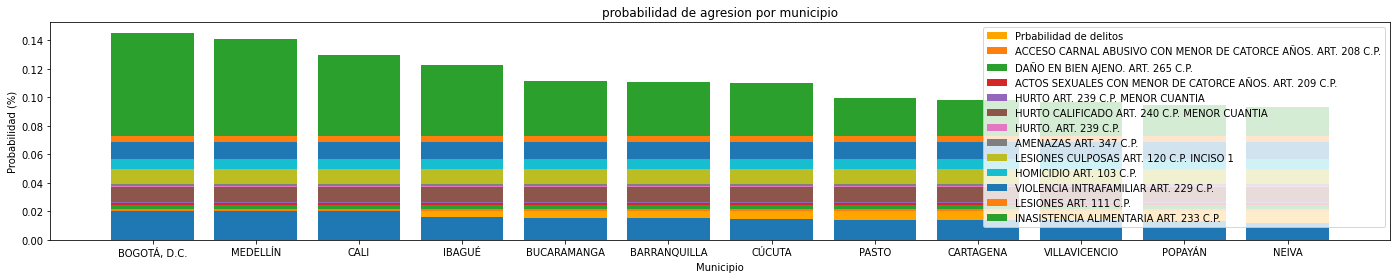

In [6]:
#Sacar promedio municipios
media_municipio =Datos['MUNICIPIO'].value_counts().mean()
indice_delito_en_municipio= np.array(list(map(lambda a: a/len(Datos['MUNICIPIO']),list(Datos['MUNICIPIO'].value_counts()))))
nombre_municipio=Datos['MUNICIPIO'].value_counts().keys()

#Sacar media de delitos
media_delitos =Datos['DELITO'].value_counts().mean()
indice_delito= np.array(list(map(lambda a: a/len(Datos['MUNICIPIO']),list(Datos['DELITO'].value_counts()))))
nombre_delito=Datos['DELITO'].value_counts().keys() 

#otros
numero_m =int(input("escribe cuantos municipios quieres ver:"))
colores =['lightgreen','lightblue','salmon','lightgray','aqua']
#Grafica


plt.figure(figsize=(numero_m*2,4))
#plt.bar()
plt.bar(np.arange(numero_m),indice_delito_en_municipio[:numero_m] )# Departamento por delitos registrados 
plt.bar(np.arange(numero_m),indice_delito[:numero_m],bottom=indice_delito_en_municipio[:numero_m],label='Prbabilidad de delitos', color=['orange'])# Departamento por probabilidad de delito

#definir porbabilidad de cada delito  por departamento 
def Delitos_departamento(x):
  if x != 0:
    x-=1
    plt.bar(np.arange(numero_m),indice_delito[:numero_m],bottom=indice_delito[x],label=nombre_delito[x])
    Delitos_departamento(x)
  else:
    return 


#otros
Delitos_departamento(numero_m)
plt.legend()
plt.xticks(np.arange(numero_m), nombre_municipio[:numero_m])
plt.title('probabilidad de agresion por municipio')
plt.ylabel('Probabilidad (%)')
plt.xlabel('Municipio')


# Creacion de modelo 

**IA ayuda a secccial de direccion**
****
Con el fin de ayudar a las victimas se creara una inteligencia artificial que  medinate los prametros de **Departamento,Municipio,ley y tipo de delito** mostrara alguna direccion de fiscalia que trate ese tipo de delito 

In [7]:
#Recoger datos ha usar
Datos_necesarios = {}
for x in ['departamento','municipio','ley','delito']:
    Datos_necesarios[x] = Datos[x.upper()]

pd.DataFrame(Datos_necesarios)

,departamento,municipio,ley,delito
0,Santander,BUCARAMANGA,Ley 906,LESIONES CULPOSAS ART. 120 C.P. INCISO 1
1,Santander,BUCARAMANGA,Ley 906,DAÑO EN BIEN AJENO. ART. 265 C.P.
2,Quindío,FILANDIA,Ley 906,CALUMNIA. ART. 221 C.P.
4,Valle del Cauca,CALI,Ley 906,ESTAFA. ART. 246 C.P. MENOR CUANTIA
5,Cundinamarca,PACHO,Ley 906,VIOLACION DE HABITACION AJENA. ART. 189 C.P.
...,...,...,...,...
59504,Santander,SOCORRO,Ley 906,LESIONES ART. 111 C.P.
59506,Antioquia,MEDELLÍN,Ley 906,ESTAFA. ART. 246 C.P. MAYOR CUANTIA
59507,Arauca,SARAVENA,Ley 906,DESPLAZAMIENTO FORZADO ART. 180 C.P.
59508,Santander,SABANA DE TORRES,Ley 906,CALUMNIA. ART. 221 C.P.


**Datos a hallar**
***
Ahora procederemos a buscar los datos que queremos que nuestro modelo prediga, los cuales eran **Direccion fiscal** o seccion en los datos.


In [8]:
#Datos que usaremos para entrenar el output del modelo
Datos_predecir = {}
Datos_predecir['seccional'] =Datos['SECCIONAL']
pd.DataFrame(Datos_predecir['seccional'].value_counts()[:10])


,SECCIONAL
DIRECCIÓN SECCIONAL DE CUNDINAMARCA,4142
DIRECCIÓN SECCIONAL DE MEDELLÍN,3877
DIRECCIÓN SECCIONAL DE ANTIOQUIA,3164
DIRECCIÓN SECCIONAL DE CALI,3122
DIRECCIÓN SECCIONAL DE TOLIMA,2834
DIRECCIÓN SECCIONAL DE BOGOTÁ,2595
DIRECCIÓN SECCIONAL DE SANTANDER,2465
DIRECCIÓN SECCIONAL DE BOYACÁ,2307
DIRECCIÓN SECCIONAL DE CAUCA,2096
DIRECCIÓN SECCIONAL DE VALLE DEL CAUCA,1972


**La mediana en la seccional**
***
Como podemos ver muchas seccionales solo han atendido de menos de 1000 casos atnedido, estos seccionales al ser tan poco productivo es mejor determinar que seccionales son utiles pra nuestro modelo.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


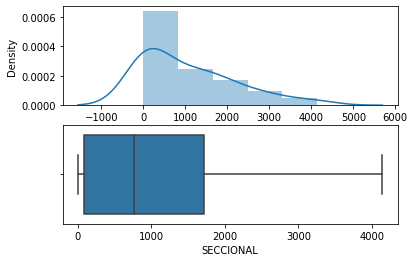

In [9]:
def Plot(df,colm=None,as_colum=True):
  if as_colum:
    fig,(axis_1,axis_2)= plt.subplots(2,1)
    sns.distplot(df[colm],ax = axis_1)
    sns.boxplot(df[colm],ax = axis_2)
  else:
    fig,(axis_1,axis_2)= plt.subplots(2,1)
    sns.distplot(df,ax = axis_1)
    sns.boxplot(df,ax = axis_2)
#Cantidad de casos atendidos por  cada seccional ORIGINAL
Plot(Datos_predecir['seccional'].value_counts(),as_colum=False)

**Nota**
***
Una vez determinado aquellas seccionales las cuales no tiene el minimo de caso necesarios para pasar, porcederemos a eliminarlas y quitar sus relativos datos 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


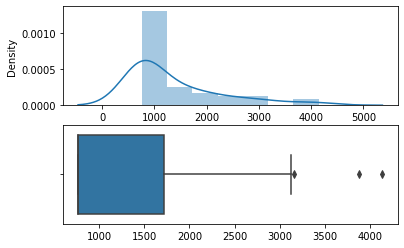

In [10]:
# Detrminar la cantidad la mediana de los casos
mediana=np.median(Datos_predecir['seccional'].value_counts())
Secciones_no = np.where(Datos_predecir['seccional'].value_counts()>=1000,Datos_predecir['seccional'].value_counts(),mediana)

#Graficar media
Plot(Secciones_no,as_colum=False)

**Vectorizar datos**
***
Ahora procedermos ha volver los datos de string a un vector para facilitrar el entrenamiento del modelo

In [11]:
def Creacion_vector(paquet):
  count = 0
  result ={}
  for variable in paquet.value_counts().keys():
    result.setdefault(variable,count)
    count +=1 
  return result
    
#diccionario de datos inputs
Diccionario=[]
Diccionario=np.asarray(list(map(Creacion_vector,Datos_necesarios.values())))

Diccionario.shape

(4,)

**Datos de salida**
***
Son las intrituciones que queremos que prediga nuestro modelo

In [12]:
def dict_list(vector):
  variables=[]
  for variable in vector.value_counts().keys():
    variables.append(variable)
  return variables

def binary_vector(variables):
  result ={}
  count =0
  for v in variables:
    binario=[0 for x in range(0,len(variables))]
    if(count == variables.index(v)):
      binario[count]=1 
    count +=1
    result.setdefault(v,binario)
    #limite de variable
  return result



In [13]:
#datos output para entranmiento del modelo
prueba=list(map(dict_list,Datos_predecir.values()))
diccionario_output=binary_vector(prueba[0])

In [14]:
nombres=list(dict(Datos_predecir['seccional'].value_counts()).keys())
zero=np.zeros(len(diccionario_output['DIRECCIÓN SECCIONAL DE BOGOTÁ']))
for x in range(len(Secciones_no)):
  if Secciones_no[x] == mediana:
    diccionario_output[nombres[x]]=zero
    print(diccionario_output[nombres[x]])



[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.

**Tranformar datos**
***
ahora que tenemos nuestro traductor de texto a numero debemos traducir todo los datos que vamos a utilizar para proceder a crear y entrenar el modelo

In [15]:
def string_a_numero(datos,vector):
  resultado=[]

  for dato in datos:
    result=[]
    for dicc in vector.keys():
      #Seccion numerica
        if dato == dicc:
          result.append(vector.get(dicc))
          resultado += result

  return resultado


In [16]:
Datos_X = np.asarray(list(map(string_a_numero,Datos_necesarios.values(),Diccionario)))
len(Datos_X[0])#comprobador del tamaño

52239

**Vectorizacion**
****
Para facilitar los dato de resultado lo haremos en forma de vector binario con la longitud del valor del dato mayor

In [17]:
Datos_y = np.array(list(map(string_a_numero,Datos_predecir.values(),[diccionario_output])))
len(Datos_y[0])#comprobador de tamaño

52239

**Modificacion de Datos_X**
****
Para faciliar el entrenamiento de los datos cambiaremos el formato de (4, X) donde el cuatro representa los vectores de  Departamento, ley, etc y la X la cantidad de elementos en total.

No obstante, esto es ambiguo para nuestro modelo, por ello cambiaremos el formato a (X,4) donde expondremos que para cada elemento contara con  4 elemntos los cuales seran el departamento, ley... ; esto con el fin de facilitar y comprender el formato que ingresara a nuestro modelo

In [18]:
#datos ambiguos
Datos_X.shape

(4, 52239)

In [19]:
#modificacion de datos
Datos_X = Datos_X.reshape(Datos_X.shape[-1],Datos_X.shape[0])

#quitar dimension en lso datos de output
Datos_y=Datos_y.reshape(Datos_y.shape[0]*Datos_y.shape[1],Datos_y.shape[-1])

Datos_X.shape

(52239, 4)

In [20]:
#datos relacionados
Datos_X[0]

array([ 3,  3, 20,  1])

***Nota:***
****
una forma de confirmar que todo salio como lo esperamos cada matriz tenga igual longitud que su original

In [21]:
#comprobador de cantidad de datos
Datos_y.shape[0] == Datos_X.shape[0]

True

**Distribucion de datos**
****
por ultimo pero no menos importante es la distibucion en datos de entrenamiento, validacion y evaluacion con el fin de comprobar el estado del modelo

In [22]:
len(Datos_X) >round(len(Datos_X)*0.5)+round(len(Datos_X)*0.25) +round(len(Datos_X)*0.25)

False

In [23]:
#Distirbucion de datos de entrenamiento
prob_train=0.45
prob_val=0.25
y_train=np.asarray(Datos_y[:round(len(Datos_y)*prob_train)])
#distibucion de datos de validacion
y_val= np.asarray(Datos_y[round(len(Datos_y)*prob_train):round(len(Datos_y)*prob_train)+round(len(Datos_y)*prob_val)])
#distribucion de datos de prueba
y_test= np.asarray(Datos_y[round(len(Datos_y)*prob_train)+round(len(Datos_y)*prob_val):round(len(Datos_y)*prob_train)+(round(len(Datos_y)*prob_val))*2])
y_val.shape

(13060, 49)

In [24]:
#Distirbucion de datos de entrenamiento
x_train=np.asarray(Datos_X[:round(len(Datos_X)*prob_train)])
#distibucion de datos de validacion
x_val= np.asarray(Datos_X[round(len(Datos_X)*prob_train):round(len(Datos_X)*prob_train)+round(len(Datos_X)*0.25)])
#distribucion de datos de prueba
x_test= np.asarray(Datos_X[round(len(Datos_X)*prob_train)+round(len(Datos_X)*0.25):round(len(Datos_X)*prob_train)+(round(len(Datos_X)*0.25))*2])
x_val.shape

(13060, 4)

**Creacion del modelo**
***

In [25]:
from keras import regularizers
hide_l=45
Model = kr.Sequential([
                       kr.layers.Input(4),
                       kr.layers.Dense(hide_l,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
                       kr.layers.Dropout(0.25),
                       kr.layers.Dense(hide_l,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
                       kr.layers.Dropout(0.25),
                       kr.layers.Dense(y_val.shape[-1],activation='softmax'),
])
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 45)                225       
                                                                 
 dropout (Dropout)           (None, 45)                0         
                                                                 
 dense_1 (Dense)             (None, 45)                2070      
                                                                 
 dropout_1 (Dropout)         (None, 45)                0         
                                                                 
 dense_2 (Dense)             (None, 49)                2254      
                                                                 
Total params: 4,549
Trainable params: 4,549
Non-trainable params: 0
_________________________________________________________________


In [26]:
Model.compile(optimizer=kr.optimizer_v2.adam.Adam(0.02),
              loss='categorical_crossentropy',
              metrics='accuracy')

In [90]:
history=Model.fit(x_train,y_train,epochs=23,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/23
46/46 [==============================] - 1s 13ms/step - loss: 2.6986 - accuracy: 0.0827 - val_loss: 2.6997 - val_accuracy: 0.0679
Epoch 2/23
46/46 [==============================] - 1s 12ms/step - loss: 2.6966 - accuracy: 0.0803 - val_loss: 2.6979 - val_accuracy: 0.0679
Epoch 3/23
46/46 [==============================] - 1s 11ms/step - loss: 2.6944 - accuracy: 0.0921 - val_loss: 2.6966 - val_accuracy: 0.0679
Epoch 4/23
46/46 [==============================] - 1s 12ms/step - loss: 2.6934 - accuracy: 0.0804 - val_loss: 2.6951 - val_accuracy: 0.0679
Epoch 5/23
46/46 [==============================] - 0s 7ms/step - loss: 2.6922 - accuracy: 0.0804 - val_loss: 2.6928 - val_accuracy: 0.0679
Epoch 6/23
46/46 [==============================] - 0s 6ms/step - loss: 2.6908 - accuracy: 0.0804 - val_loss: 2.6923 - val_accuracy: 0.0679
Epoch 7/23
46/46 [==============================] - 0s 6ms/step - loss: 2.6897 - accuracy: 0.0986 - val_loss: 2.6910 - val_accuracy: 0.0679
Epoch 8/23
46/46

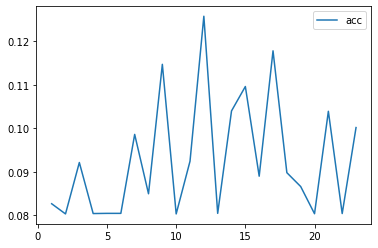

In [91]:
loss = history.history['loss']
val_loss= history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epcohs= range(1,len(acc)+1)

#Grafica de accuracy
plt.plot(epcohs,acc, label='acc')
plt.legend()


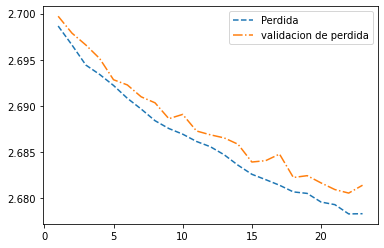

In [92]:
plt.plot(epcohs,loss,'--' ,label='Perdida')
plt.plot(epcohs,val_loss,'-.',label='validacion de perdida')
plt.legend()


In [93]:
evaluate=Model.evaluate(x_test,y_test)

409/409 [==============================] - 1s 1ms/step - loss: 2.6668 - accuracy: 0.0701


In [31]:
int(evaluate[-1]*1000)

70

**Glosario y modelo**
***


In [74]:
indices={}
for columna in Datos_necesarios.keys():
  indices.setdefault(columna,list(dict(Datos_necesarios[columna].value_counts()).keys()))
  print(list(dict(Datos_necesarios[columna].value_counts()).keys()))

['Antioquia', 'Valle del Cauca', 'Cundinamarca', 'Santander', 'Tolima', 'BOGOTÁ, D. C.', 'Boyaca', 'Cauca', 'Huila', 'Norte de Santander', 'Meta', 'Bolívar', 'Nariño', 'Córdoba', 'Atlántico', 'Risaralda', 'Cesar', 'Magdalena', 'Caldas', 'Sucre', 'Quindío', 'Casanare', 'Caquetá', 'La Guajira', 'Chocó', 'Arauca', 'Putumayo', 'Guaviare', 'Archipiélago de San Andrés, Providencia y Santa Catalina', 'Amazonas', 'Vichada', 'Guainía', 'Vaupés']
['BOGOTÁ, D.C.', 'MEDELLÍN', 'CALI', 'IBAGUÉ', 'BUCARAMANGA', 'BARRANQUILLA', 'CÚCUTA', 'PASTO', 'CARTAGENA', 'VILLAVICENCIO', 'POPAYÁN', 'NEIVA', 'PEREIRA', 'SANTA MARTA', 'MONTERÍA', 'SOACHA', 'PALMIRA', 'BELLO', 'ARMENIA', 'VALLEDUPAR', 'BARRANCABERMEJA', 'MANIZALES', 'SINCELEJO', 'ITAGUI', 'FLORENCIA', 'TUNJA', 'SOLEDAD', 'TULUÁ', 'QUIBDO', 'FLORIDABLANCA', 'ENVIGADO', 'FUSAGASUGÁ', 'SOGAMOSO', 'RIONEGRO', 'GIRARDOT', 'DUITAMA', 'YOPAL', 'PITALITO', 'BUENAVENTURA', 'GUADALAJARA DE BUGA', 'SANTANDER DE QUILICHAO', 'OCANA', 'RIOHACHA', 'ESPINAL', 'CAR

In [77]:
indices

['Ley 906', 'Ley 1098', 'Jurisdicción Menores', 'LEY 600']

In [81]:
with open('Glorasio.json','w') as file:
  file.write(str(indices))

In [33]:
Model.save(f'Modelo_acc_{str(int(evaluate[-1]*1000))}.h5')#modelo util para backend

# Guardar modelo tenserflow js
***
guardaremos nuestor modelo en un archivo *.json* con el fin de poder incluirlos en el frontend.

In [34]:
model_json=Model.to_json()#crear modelo json

#guardar modelo
with open('model_json.json','w') as file:
  file.write(model_json)